In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Function to read images from a folder and label them based on folder name
def read_images_and_label(folder_path):
    image_data = []
    labels = []

    # Create a label encoder to convert string labels to numerical values
    label_encoder = LabelEncoder()

    # Iterate through the folders in the specified path
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)

        # Check if the item in the directory is a folder
        if os.path.isdir(label_path):
            # Iterate through images in the folder
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)

                # Read the image using OpenCV
                img = cv2.imread(image_path)

                # Perform any additional processing on the image if needed

                # Resize the image to a consistent size (e.g., 256x256)
                img = cv2.resize(img, (64, 64))

                # Normalize pixel values to the range [0, 1]
                img = img.astype('float32') / 64.0

                # Append the image data and corresponding label
                image_data.append(img)
                labels.append(label)

    # Convert labels to numerical values using label encoder
    encoded_labels = label_encoder.fit_transform(labels)

    return np.array(image_data), np.array(encoded_labels)

# Specify the path to the folder containing labeled subfolders of images
folder_path = "C:\\Users\\glowi\Desktop\\SYNC_internship\\Plant disease\\archive\\plantvillage dataset\\segmented"


In [2]:
# Call the function to read images and labels
images, labels = read_images_and_label(folder_path)


In [3]:
images


array([[[[0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         ...,
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ]],

        [[0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         ...,
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ]],

        [[0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         ...,
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ]],

        ...,

        [[0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         ...,
         [0.      , 0.      , 0.      ],
         [0.      , 0.

In [4]:
labels

array([ 0,  0,  0, ..., 35, 35, 35], dtype=int64)

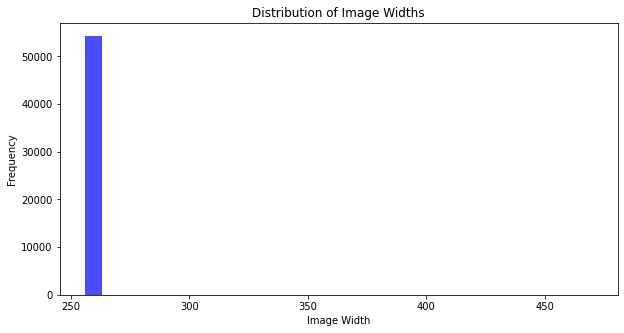

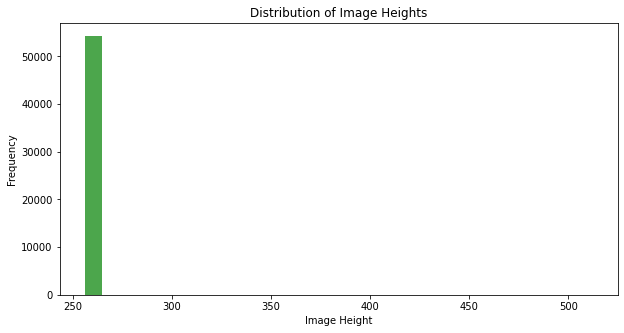

Average Image Width: 256.010514491953 pixels
Average Image Height: 256.0188561116635 pixels


In [5]:

# Function to calculate and plot the distribution of image sizes
def plot_image_size_distribution(folder_path):
    # Lists to store image widths and heights
    image_widths = []
    image_heights = []

    # Iterate through the folders in the specified path
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)

        # Check if the item in the directory is a folder
        if os.path.isdir(label_path):
            # Iterate through images in the folder
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)

                # Read the image using OpenCV
                img = cv2.imread(image_path)

                # Get image dimensions
                height, width, _ = img.shape

                # Append image dimensions to the lists
                image_widths.append(width)
                image_heights.append(height)

    # Plot the distribution of image widths
    plt.figure(figsize=(10, 5))
    plt.hist(image_widths, bins=30, color='blue', alpha=0.7)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Image Width')
    plt.ylabel('Frequency')
    plt.show()

    # Plot the distribution of image heights
    plt.figure(figsize=(10, 5))
    plt.hist(image_heights, bins=30, color='green', alpha=0.7)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Image Height')
    plt.ylabel('Frequency')
    plt.show()

    # Display summary statistics
    print(f"Average Image Width: {np.mean(image_widths)} pixels")
    print(f"Average Image Height: {np.mean(image_heights)} pixels")

# Call the function to plot the image size distribution
plot_image_size_distribution(folder_path)

# Function to visualize individual color channels for a single image
def visualize_color_channels(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)

    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Split the image into individual color channels
    channel_blue = img_rgb[:, :, 0]
    channel_green = img_rgb[:, :, 1]
    channel_red = img_rgb[:, :, 2]

    # Plot the original image and individual color channels
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(channel_blue, cmap='Blues')
    plt.title('Blue Channel')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(channel_green, cmap='Greens')
    plt.title('Green Channel')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(channel_red, cmap='Reds')
    plt.title('Red Channel')
    plt.axis('off')

    plt.show()

# Function to visualize individual color channels for all images in a folder
def visualize_color_channels_for_all(folder_path):
    # Iterate through the folders in the specified path
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)

        # Check if the item in the directory is a folder
        if os.path.isdir(label_path):
            # Iterate through images in the folder
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)

                # Read and visualize color channels for each image
                visualize_color_channels(image_path)

# Call the function to visualize color channels for all images in the folder
visualize_color_channels_for_all(folder_path)

In [6]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.3, random_state=42, shuffle = True)

In [8]:
# Define a learning rate scheduler
def lr_schedule(epoch):
    initial_lr = 0.0001
    drop = 0.5
    epochs_drop = 5
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

In [9]:
# Create a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),  
    
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='relu'),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(32, activation='relu'),
    
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax for classification
])

# Specify the optimizer with gradient clipping
optimizer = Adam(clipvalue=0.5)

# Compile the model
model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
Train_History=model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

#Saving the model
model.save('CNN_Segmented_PlantDisease_64.h5')

Epoch 1/30
1188/1188 [==============================] - 72s 60ms/step - loss: 2.1783 - accuracy: 0.4395 - val_loss: 1.4890 - val_accuracy: 0.5951 - lr: 1.0000e-04
Epoch 2/30
1188/1188 [==============================] - 73s 61ms/step - loss: 1.1606 - accuracy: 0.6767 - val_loss: 1.0126 - val_accuracy: 0.7145 - lr: 1.0000e-04
Epoch 3/30
1188/1188 [==============================] - 73s 62ms/step - loss: 0.8011 - accuracy: 0.7658 - val_loss: 0.8819 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 4/30
1188/1188 [==============================] - 71s 60ms/step - loss: 0.6091 - accuracy: 0.8154 - val_loss: 0.8075 - val_accuracy: 0.7625 - lr: 1.0000e-04
Epoch 5/30
1188/1188 [==============================] - 73s 61ms/step - loss: 0.4858 - accuracy: 0.8478 - val_loss: 0.6550 - val_accuracy: 0.7908 - lr: 1.0000e-04
Epoch 6/30
1188/1188 [==============================] - 73s 62ms/step - loss: 0.3658 - accuracy: 0.8843 - val_loss: 0.3989 - val_accuracy: 0.8744 - lr: 5.0000e-05
Epoch 7/30
1188/1188 [